# Air Pollution

# Data preprocessing

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [2]:
air=pd.read_csv("Air_Pollution.csv")

In [3]:
air.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
air.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [5]:
#check null values
air.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [6]:
#Deal with missing values
air["pm2.5"].fillna(air["pm2.5"].mean(),inplace=True)

In [7]:
air.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [8]:
#Check data information
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   43824 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [9]:
#Check duplicate values
air.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
43819    False
43820    False
43821    False
43822    False
43823    False
Length: 43824, dtype: bool

In [10]:
#Label encoding
air.keys()

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [11]:
air["cbwd"].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [12]:

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
air["cbwd"]=label_encoder.fit_transform(air["cbwd"])

In [13]:
air["cbwd"].unique()

array([1, 3, 0, 2])

In [14]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   43824 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  int32  
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int32(1), int64(8)
memory usage: 4.2 MB


In [15]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
air["pm2.5"]=scale.fit_transform(air[["pm2.5"]])
air["Iws"]=scale.fit_transform(air[["Iws"]])

In [16]:
air.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,0.099208,-21,-11.0,1021.0,1,0.002290,0,0
1,2,2010,1,1,1,0.099208,-21,-12.0,1020.0,1,0.007639,0,0
2,3,2010,1,1,2,0.099208,-21,-11.0,1019.0,1,0.010698,0,0
3,4,2010,1,1,3,0.099208,-21,-14.0,1019.0,1,0.016047,0,0
4,5,2010,1,1,4,0.099208,-20,-12.0,1018.0,1,0.021396,0,0


# EDA

In [17]:
air.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,0.099208,1.817246,12.448521,1016.447654,1.663267,0.040057,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,0.090396,14.433440,12.198613,10.268698,0.937981,0.085466,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.000000,0.000000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,0.031187,-10.000000,2.000000,1008.000000,1.000000,0.002290,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,0.077465,2.000000,14.000000,1016.000000,2.000000,0.008408,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,0.132797,15.000000,23.000000,1025.000000,2.000000,0.036674,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,1.000000,28.000000,42.000000,1046.000000,3.000000,1.000000,27.000000,36.000000


In [18]:
#Which year has the highest pollution 


<Axes: xlabel='year', ylabel='count'>

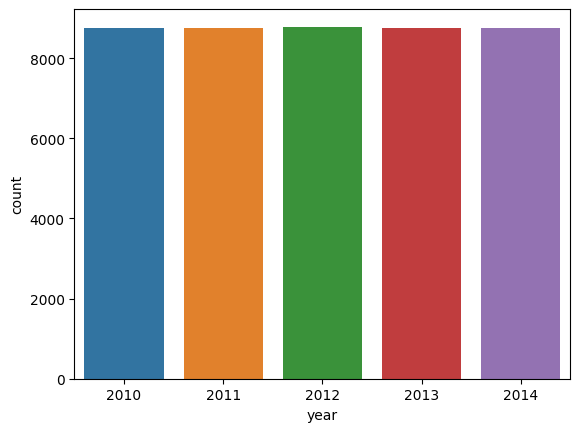

In [19]:
sns.countplot(x=air['year'],data=air)

<Axes: ylabel='Frequency'>

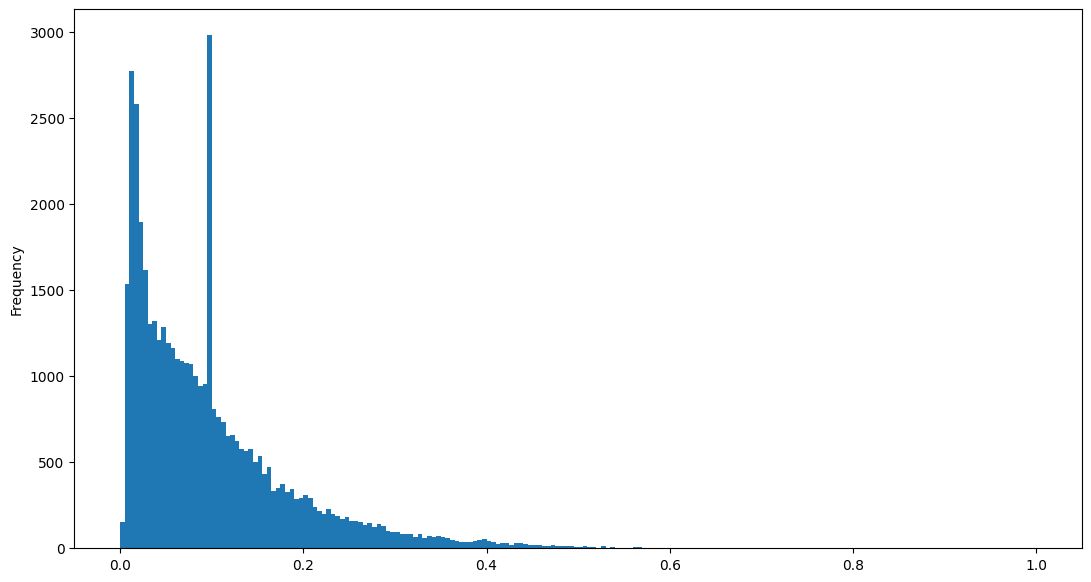

In [20]:
#Concentration of pm2.5
air["pm2.5"].plot.hist(bins=200,figsize=(13,7))


<Axes: xlabel='cbwd', ylabel='Count'>

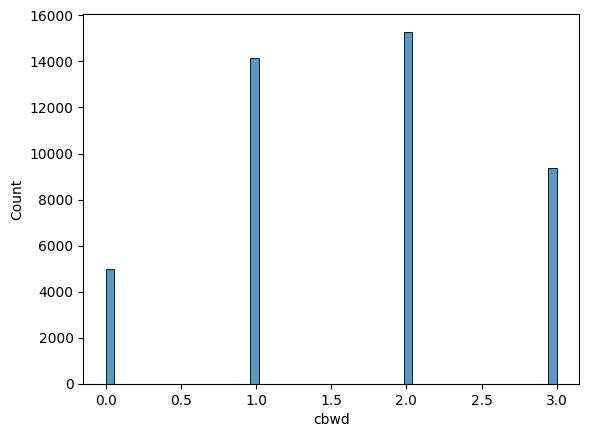

In [21]:
sns.histplot(data=air["cbwd"])

<Axes: xlabel='year', ylabel='pm2.5'>

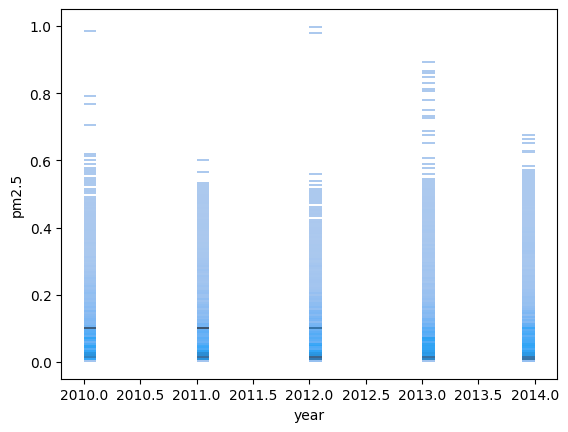

In [22]:
#Which year has the highest PM2.5
sns.histplot(x=air["year"],y=air["pm2.5"])

<Axes: xlabel='Iws', ylabel='pm2.5'>

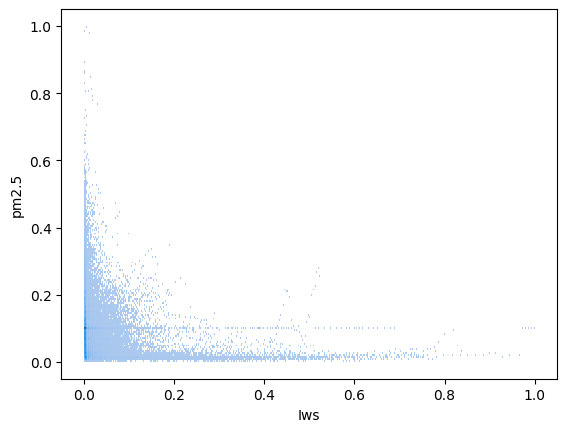

In [23]:
sns.histplot(x=air["Iws"],y=air["pm2.5"])

<Axes: xlabel='TEMP', ylabel='DEWP'>

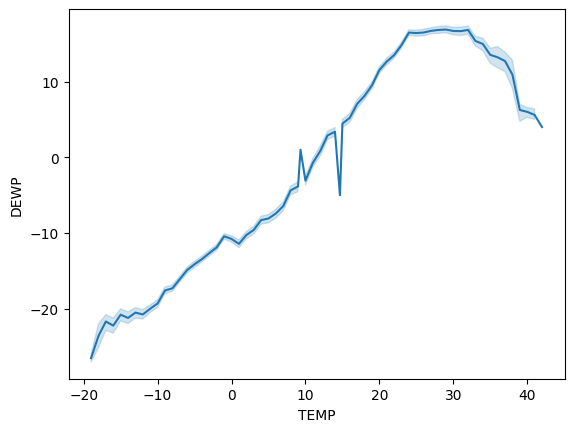

In [24]:
sns.lineplot(x=air["TEMP"],y=air["DEWP"]

<Axes: >

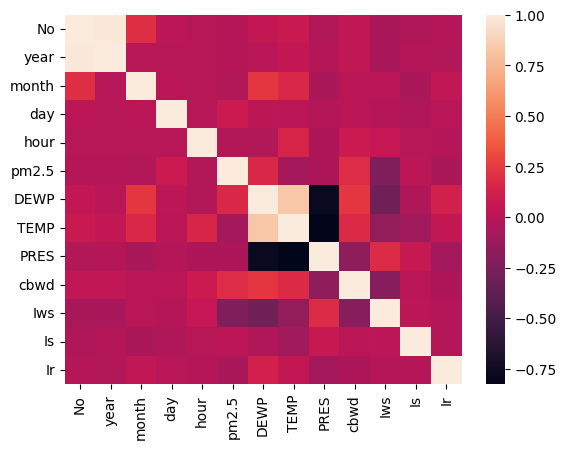

In [37]:
sns.heatmap(air.corr())

# Model Implementation

In [26]:
#Split the data
from sklearn.model_selection import train_test_split
air=air.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,]]
x=air.iloc[:,:-1]
y=air.iloc[:,1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

# Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
RR =Ridge(alpha=0.1)
RR.fit(x_train,y_train)
y_pred_train_rr=RR.predict(x_train)
y_pred_test_rr=RR.predict(x_test)

# Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,max_depth=7,min_samples_split=7,min_samples_leaf=3)
rfr.fit(x_train,y_train)
y_pred_train_rfr=rfr.predict(x_train)
y_pred_test_rfr=rfr.predict(x_test)

# Overfitting

# for Random Forest Regressor

In [29]:
test_score=rfr.score(x_test,y_test)
train_score=rfr.score(x_train,y_train)
if train_score >test_score:
    print("Model is overfit")
    print("Test_score:",test_score)
    print("Train_score:",train_score)
else: 
    print("model is not overfit")

Model is overfit
Test_score: 0.999997501397185
Train_score: 0.999998266019043


# for Ridge regression

In [30]:
#Check Overfitting
Train_score=RR.score(x_train,y_train)
Test_score=RR.score(x_test,y_test)
if Train_score > Test_score:
    print("Ridge Regression Model is Overfit")
    print("Training Scores: ",Train_score)
    print("Testing Score:",Test_score)
else:
    print("Ridge Regression is not overfit:")
    print("Training Scores: ",Train_score)
    print("Testing Score:",Test_score)
    

Ridge Regression Model is Overfit
Training Scores:  0.9999995489825342
Testing Score: 0.999999541135648


# Model Evaluation

# For Ridge Regression

In [31]:
print("Model Evaluation for Ridge Regression")
print("-----------------------Model Evaluation for training data --------------------------")
print("The Mean Squared Error for ridge regression is:       ",mean_squared_error(y_train,y_pred_train_rr))
print("The Mean Absolute Error for ridge regression is:      ",mean_absolute_error(y_train,y_pred_train_rr))
print("The Root Mean Squared Error for Ridge Regression is:  ",np.sqrt(mean_squared_error(y_train,y_pred_train_rr)))
print("\n---------------------Model Evaluation for testing data ---------------------------")
print("The Mean Squared Error for ridge regression is:       ",mean_squared_error(y_test,y_pred_test_rr))
print("The Mean Absolute Error for ridge regression is:      ",mean_absolute_error(y_test,y_pred_test_rr))
print("The Root Mean Squared Error for Ridge Regression is:  ",np.sqrt(mean_squared_error(y_test,y_pred_test_rr)))


Model Evaluation for Ridge Regression
-----------------------Model Evaluation for training data --------------------------
The Mean Squared Error for ridge regression is:        9.011783613574844e-07
The Mean Absolute Error for ridge regression is:       0.0007587440865351087
The Root Mean Squared Error for Ridge Regression is:   0.0009493041458655305

---------------------Model Evaluation for testing data ---------------------------
The Mean Squared Error for ridge regression is:        9.177180737181539e-07
The Mean Absolute Error for ridge regression is:       0.0007635047247493424
The Root Mean Squared Error for Ridge Regression is:   0.0009579760298244178


# For Random Forest Regressor  

In [32]:
print("Model Evaluation for Random Forest Regressor")
print("-----------------------Model Evaluation for training data --------------------------")
print("The Mean Squared Error for Random Forest Regressor is:       ",mean_squared_error(y_train,y_pred_train_rfr))
print("The Mean Absolute Error for Random Forest Regressor is:      ",mean_absolute_error(y_train,y_pred_train_rfr))
print("The Root Mean Squared Error for Random Forest Regressor is:  ",np.sqrt(mean_squared_error(y_train,y_pred_train_rfr)))
print("\n---------------------Model Evaluation for testing data ---------------------------")
print("The Mean Squared Error for Random Forest Regressor is:       ",mean_squared_error(y_test,y_pred_test_rfr))
print("The Mean Absolute Error for Random Forest Regressor is:      ",mean_absolute_error(y_test,y_pred_test_rfr))
print("The Root Mean Squared Error for Random Forest Regressor is:  ",np.sqrt(mean_squared_error(y_test,y_pred_test_rfr)))


Model Evaluation for Random Forest Regressor
-----------------------Model Evaluation for training data --------------------------
The Mean Squared Error for Random Forest Regressor is:        3.4646687457227644e-06
The Mean Absolute Error for Random Forest Regressor is:       3.384802616566033e-05
The Root Mean Squared Error for Random Forest Regressor is:   0.001861362067337455

---------------------Model Evaluation for testing data ---------------------------
The Mean Squared Error for Random Forest Regressor is:        4.9971477467198986e-06
The Mean Absolute Error for Random Forest Regressor is:       4.449515116940932e-05
The Root Mean Squared Error for Random Forest Regressor is:   0.0022354301032955375


# Cross Validation 

# For Ridge Regression

In [33]:
#Import Libraries
from sklearn.model_selection import cross_val_score,KFold
CVS=cross_val_score
k_folds=KFold(n_splits=10,shuffle=True,random_state=1) 


In [34]:
#Cross Validation
score_rr=CVS(RR,x_test,y_test,cv=10)
score_rr
from sklearn import metrics
k_folds=KFold(n_splits=10,shuffle=True,random_state=40)

Train_score=[]
Test_score=[]
for train_index,test_index in k_folds.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = x.iloc[train_index], x.iloc[test_index]
    RR.fit(x_train, y_train)
    y_pred_test = RR.predict(x_test)
    y_pred_train = RR.predict(x_train)
    MAE_test = mean_absolute_error(y_pred_test,y_test)
    MAE_train =mean_absolute_error(y_pred_train,y_train)
    Test_score.append(MAE_test)
    Train_score.append(MAE_train)
print("\nTraining MeanSquaredError Scores for Each Fold:")
for fold, score in enumerate(Train_score):
    print(f"Fold {fold+1}: {score}")

print("\nTesting MeanSquaredError Scores for Each Fold:")
for fold, score in enumerate(Test_score):
    print(f"Fold {fold+1}: {score}")
average_mae_train = sum(Train_score) / len(Train_score)
print("\nAverage MeanSquaredError Training Score:", average_mae_train)

average_mae_test = sum(Test_score) / len(Test_score)
print("\nAverage MeanSquaredError Testing Score:", average_mae_test)



Training MeanSquaredError Scores for Each Fold:
Fold 1: 6.115846685855552e-05
Fold 2: 6.113030421012254e-05
Fold 3: 6.117623043236183e-05
Fold 4: 6.120886819040809e-05
Fold 5: 6.123237302774746e-05
Fold 6: 6.118402341799695e-05
Fold 7: 6.120162908439247e-05
Fold 8: 6.118839038703971e-05
Fold 9: 6.111816844569327e-05
Fold 10: 6.118746209498216e-05

Testing MeanSquaredError Scores for Each Fold:
Fold 1: 6.166095163678466e-05
Fold 2: 6.220578626704756e-05
Fold 3: 6.10489109255755e-05
Fold 4: 6.0852955826371596e-05
Fold 5: 6.051910341887625e-05
Fold 6: 5.992196177223174e-05
Fold 7: 6.028579477203672e-05
Fold 8: 6.18059739001766e-05
Fold 9: 6.238799333387209e-05
Fold 10: 6.125453217517195e-05

Average MeanSquaredError Training Score: 6.117859161493e-05

Average MeanSquaredError Testing Score: 6.119439640281446e-05


# For Random Forest Regressor

In [36]:
#Cross Validation
score_rfr=CVS(rfr,x_test,y_test,cv=10)
score_rfr
from sklearn import metrics
k_folds=KFold(n_splits=10,shuffle=True,random_state=40)

Train_score=[]
Test_score=[]
for train_index,test_index in k_folds.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = x.iloc[train_index], x.iloc[test_index]
    rfr.fit(x_train, y_train)
    y_pred_test = rfr.predict(x_test)
    y_pred_train = rfr.predict(x_train)
    MAE_test = mean_absolute_error(y_pred_test,y_test)
    MAE_train =mean_absolute_error(y_pred_train,y_train)
    Test_score.append(MAE_test)
    Train_score.append(MAE_train)
print("\nTraining MeanSquaredError Scores for Each Fold:")
for fold, score in enumerate(Train_score):
    print(f"Fold {fold+1}: {score}")

print("\nTesting MeanSquaredError Scores for Each Fold:")
for fold, score in enumerate(Test_score):
    print(f"Fold {fold+1}: {score}")
mae_accuracy_train = sum(Train_score) / len(Train_score)
print("\nAverage MeanSquaredError Training Score:", average_mae_train)

mae_accuracy_test = sum(Test_score) / len(Test_score)
print("\nAverage MeanSquaredError Testing Score:", average_mae_test)



Training MeanSquaredError Scores for Each Fold:
Fold 1: 5.282011972426227
Fold 2: 5.252681376434851
Fold 3: 4.936321936512479
Fold 4: 5.211034335368491
Fold 5: 4.983333254032931
Fold 6: 5.385446036977714
Fold 7: 4.966436958926377
Fold 8: 5.069123340251719
Fold 9: 4.942860675873041
Fold 10: 5.095620830798725

Testing MeanSquaredError Scores for Each Fold:
Fold 1: 5.33917036354262
Fold 2: 5.257882852432922
Fold 3: 4.969049228960374
Fold 4: 5.259507725473071
Fold 5: 4.960729623603936
Fold 6: 5.4951066021187
Fold 7: 4.985391233107692
Fold 8: 5.100814383801661
Fold 9: 4.9493602572560365
Fold 10: 5.038735931105517

Average MeanSquaredError Training Score: 6.117859161493e-05

Average MeanSquaredError Testing Score: 6.119439640281446e-05
